In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading datasets

In [2]:
X,y = load_breast_cancer(return_X_y=True)
X.size

17070

In [3]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=0)
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# Fitting the data

In [4]:
lr = LogisticRegression()

In [5]:
lr.fit(X_train, y_train)

c:\Users\andre\Desktop\Università\Magistrale\AAUT\env AAUT\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Making predictions

In [6]:
predicted = lr.predict(X_test)
print(predicted)
scores = lr.predict_proba(X_test)[:,1] # versione scoring del calssificatore. score delle calssificazioni
scores

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


array([4.39312676e-03, 9.82304998e-01, 9.98074597e-01, 8.23837762e-01,
       9.99927034e-01, 9.97666036e-01, 9.94626430e-01, 9.98615422e-01,
       9.79839805e-01, 9.99668038e-01, 3.16240339e-01, 8.81737376e-01,
       9.97209566e-01, 1.40035289e-01, 6.98933362e-01, 3.40377829e-03,
       9.85083173e-01, 1.36333896e-09, 6.52198748e-04, 4.36767759e-13,
       7.12036645e-06, 8.04424391e-02, 9.98696225e-01, 9.90524655e-01,
       7.44161574e-03, 9.82017507e-01, 9.97615589e-01, 1.57616296e-01,
       9.97742737e-01, 7.41877162e-12, 9.99552059e-01, 1.37622698e-08,
       6.01592904e-01, 3.14963449e-04, 9.99812345e-01, 1.09105435e-03,
       9.01960040e-01, 5.57615350e-07, 9.96887383e-01, 1.71561694e-04,
       7.44306514e-02, 9.95105472e-01, 1.75975907e-03, 9.99216419e-01,
       3.33905879e-02, 6.92580805e-14, 9.99742840e-01, 9.74126073e-01,
       9.98627085e-01, 2.66653214e-04, 4.54194392e-07, 3.00396445e-01,
       2.27608028e-07, 9.96616957e-01, 9.91881405e-01, 9.99206211e-01,
      

# Functions for evaluating fp,tp and accuracy

In [7]:
def eval_fp_tp(actual, predicted, threshold):
    # returns tuple (fp, tp)
    tp = 0
    fp = 0
    for i in range(len(actual)):
        if predicted[i] >= threshold and actual[i] == 1:
            tp += 1
        elif actual[i] == 0 and predicted[i] >= threshold:
            fp += 1
    return fp, tp

In [8]:
eval_fp_tp(y_test, scores, 0.5)

(1, 84)

In [9]:
def eval_accuracy(actual, predicted, threshold):
    correct = 0
    for i in range(len(actual)):
        if predicted[i] >= threshold and actual[i] == 1:
            correct += 1
        elif predicted[i] < threshold and actual[i] == 0:
            correct += 1
    return correct/len(actual)

In [10]:
eval_accuracy(y_test, scores, 0.5)

0.951048951048951

# fp,tp and accuracy evaluations for different thresholds

Given the scores for the test cases, we might want to find the best possible threshold for classification, i.e., the real value $t$ such that `scores >` $t$ gives the best classifiation of the examples. 

Let us then start to consider 100 possible thresholds in the range $[0,1]$:

In [11]:
thresholds = np.linspace(0.01,1,100)
thresholds

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

and compute the tp, fp, and accuracy values of the labelings obtained by comparing the scores with those thresholds.

In [12]:
performances = []
fps, tps = [], []

for t in thresholds:
    fp, tp = eval_fp_tp(y_test, scores, t)
    fps.append(fp)
    tps.append(tp)
    acc = eval_accuracy(y_test, scores, t)
    print(f"Threshold: {t:.2f} - Accuracy: {acc:.2f} - FP: {fp} - TP: {tp}")
    performances.append((acc, t, fp, tp))

performances = np.array(performances)
print(performances)

Threshold: 0.01 - Accuracy: 0.92 - FP: 11 - TP: 90
Threshold: 0.02 - Accuracy: 0.92 - FP: 11 - TP: 90
Threshold: 0.03 - Accuracy: 0.92 - FP: 11 - TP: 90
Threshold: 0.04 - Accuracy: 0.92 - FP: 10 - TP: 89
Threshold: 0.05 - Accuracy: 0.93 - FP: 9 - TP: 89
Threshold: 0.06 - Accuracy: 0.94 - FP: 8 - TP: 89
Threshold: 0.07 - Accuracy: 0.94 - FP: 8 - TP: 89
Threshold: 0.08 - Accuracy: 0.94 - FP: 7 - TP: 89
Threshold: 0.09 - Accuracy: 0.95 - FP: 6 - TP: 89
Threshold: 0.10 - Accuracy: 0.95 - FP: 6 - TP: 89
Threshold: 0.11 - Accuracy: 0.95 - FP: 6 - TP: 89
Threshold: 0.12 - Accuracy: 0.95 - FP: 6 - TP: 89
Threshold: 0.13 - Accuracy: 0.95 - FP: 6 - TP: 89
Threshold: 0.14 - Accuracy: 0.95 - FP: 6 - TP: 89
Threshold: 0.15 - Accuracy: 0.94 - FP: 6 - TP: 88
Threshold: 0.16 - Accuracy: 0.95 - FP: 5 - TP: 88
Threshold: 0.17 - Accuracy: 0.95 - FP: 5 - TP: 88
Threshold: 0.18 - Accuracy: 0.97 - FP: 3 - TP: 88
Threshold: 0.19 - Accuracy: 0.97 - FP: 3 - TP: 88
Threshold: 0.20 - Accuracy: 0.97 - FP: 3 - TP:

# Plotting

Let us then start plotting the coverage plot for the obtained classifications.

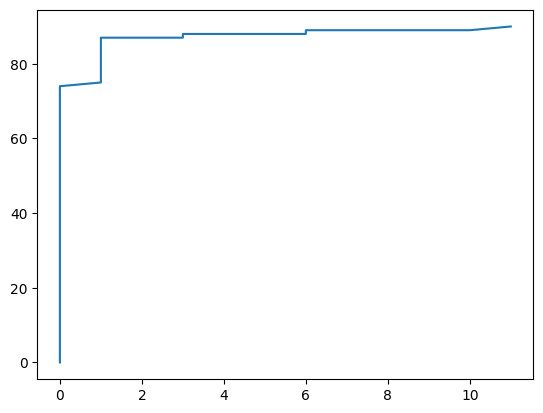

In [13]:
plt.plot(fps, tps)


# Checking performances for threshold 0.5

The predict_proba method we used to get the score returns the probability that examples belong to the positive class. Usually the positive class is then predicted as score > 0.5 (since in this case it is the one with the largest likelihood).

Let's then see where this classifier (i.e., the one obtained setting the threshold to 0.5) lays in the coverage plot and if there are better options.

**note**: since we saved interesting stats in the `performances` array, we can retrieve the fp, tp position of the classifier we get by setting the thresholds to 0.5, by finding the position of the row we are interested using the expression: `performances[:,1] == 0.5` and then using the resulting boolean vector to retrieve the correct row of the matrix: `performances[performances[:,1] == 0.5]`.
```

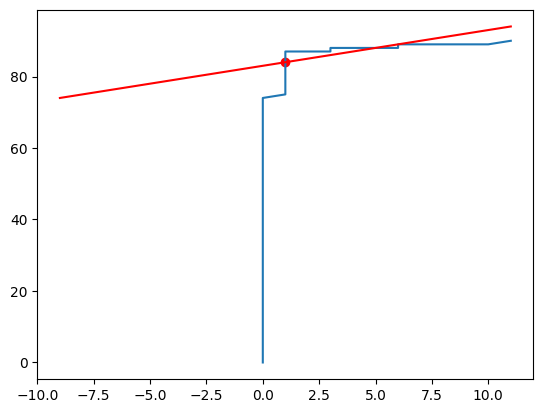

In [14]:
plt.plot(fps, tps)
accuracy, threshold, fp, tp = performances[performances[:,1] == 0.5][0]
plt.scatter(fp,tp,color='red')
plt.plot([fp-10,fp+10],[tp-10,tp+10], color="red")

As it is shown by the red dot and the red line, threshold 0.5 is a good one, but apparently two other points can reach a better classification.

Let us see where these point lay in the plot and what is their accuracy.

In [15]:
# Note: the subscription returns a matrix with a single row, but still two dimensions, 
# we need to get the element in the first position of that matrix...

perf05 = performances[performances[:, 1] == 0.5][0,0] 
performances[performances[:,0] > perf05]

array([[ 0.96503497,  0.18      ,  3.        , 88.        ],
       [ 0.96503497,  0.19      ,  3.        , 88.        ],
       [ 0.96503497,  0.2       ,  3.        , 88.        ],
       [ 0.96503497,  0.21      ,  3.        , 88.        ],
       [ 0.96503497,  0.22      ,  3.        , 88.        ],
       [ 0.95804196,  0.23      ,  3.        , 87.        ],
       [ 0.96503497,  0.24      ,  2.        , 87.        ],
       [ 0.96503497,  0.25      ,  2.        , 87.        ],
       [ 0.96503497,  0.26      ,  2.        , 87.        ],
       [ 0.96503497,  0.27      ,  2.        , 87.        ],
       [ 0.96503497,  0.28      ,  2.        , 87.        ],
       [ 0.96503497,  0.29      ,  2.        , 87.        ],
       [ 0.96503497,  0.3       ,  2.        , 87.        ],
       [ 0.97202797,  0.31      ,  1.        , 87.        ],
       [ 0.96503497,  0.32      ,  1.        , 86.        ],
       [ 0.96503497,  0.33      ,  1.        , 86.        ],
       [ 0.96503497,  0.

The two points that we are looking for are then in position (5,121) and (1,117)

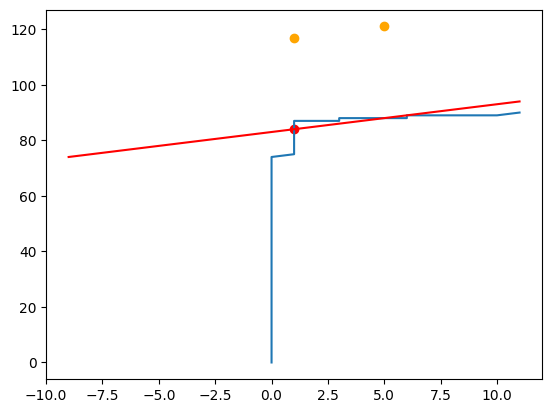

In [16]:
plt.plot(fps, tps)
fp, tp = eval_fp_tp(y_test, scores > 0.5, 0.5)
plt.scatter(fp,tp, color="red")
plt.scatter(5,121, color="orange")
plt.scatter(1,117, color="orange")
plt.plot([fp-10,fp+10],[tp-10,tp+10], color="red")

These two points (that we found by looking only to the accuracies) are indeed the two points that the plot show having a better accuracy. 